https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from  tqdm import tqdm
import gc
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

pd.set_option("display.max_columns", 2000)

In [2]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [5]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [6]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [7]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## 学習データ準備

In [9]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = pd.read_csv('../input/application_test.csv')


# Remove some rows with values not present in test set
#app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_INCOME_TYPE'] == 'Maternity leave'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace = True)
app_train['bur NAN num'] = app_train.isnull().sum(axis = 1).values
app_test['bur NAN num'] = app_test.isnull().sum(axis = 1).values


app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

### <a id="0.1">0.1 Prepare - Data Cleaning</a>

In [10]:
    
# Remove some empty features
data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
            'FLAG_DOCUMENT_21'], axis = 1, inplace = True)
    
# Replace some outliers
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
data.loc[data['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
data.loc[data['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
data.loc[data['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
data.loc[data['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
data.loc[data['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan

### <a id="0.2">0.2 Prepare - Categorical Data Processing</a>

In [11]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

## feature engineering

### <a id="1.1">1.1 Feature Engineering - Previous Applications</a>

In [13]:

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['pre SK_ID_PREV_CNT'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
previous_application.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Days 365.243 values -> nan
previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# nan num
previous_application['pre NAN num'] = previous_application.isnull().sum(axis = 1).values

# Add feature: value ask / value received percentage
previous_application['pre AMT_APPLICATION / AMT_CREDIT'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre loan AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['pre revo AMT_APPLICATION / AMT_CREDIT'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']

previous_application['pre loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Cash loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre con loan AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Consumer loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']
previous_application['pre revo AMT_CREDIT / AMT_ANNUITY'] = previous_application['NAME_CONTRACT_TYPE_Revolving loans'] * previous_application['AMT_CREDIT'] / previous_application['AMT_ANNUITY']

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['pre_' + col + '_MEAN' for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')
del prev_apps_avg
gc.collect()

# Previous applications numeric features
num_aggregations = {
        'AMT_ANNUITY': ['max'],
        'AMT_APPLICATION': ['max'],
        'AMT_CREDIT': ['max'],
        'pre AMT_APPLICATION / AMT_CREDIT': ['max'],
        'AMT_DOWN_PAYMENT': ['max'],
        'AMT_GOODS_PRICE': ['max'],
        'HOUR_APPR_PROCESS_START': ['max'],
        'RATE_DOWN_PAYMENT': ['max'],
        'DAYS_DECISION': ['max'],
        'CNT_PAYMENT': ['sum'],
}

cat_aggregations = {}

prev_agg = previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['pre_' + e[0] for e in prev_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['pre_APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['pre_REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_done = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg
gc.collect()

data = data.merge(right=prev_done.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.2">1.2 Feature Engineering - Bureau Data</a>

In [14]:
bureau['bur NAN num'] = bureau.isnull().sum(axis = 1).values
bureau_balance['bur_bal NAN num'] = bureau_balance.isnull().sum(axis = 1).values

# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['bur CNT'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['bur_' + f_ + 'MEAN' for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')
del bureau_avg
gc.collect()

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bureau_balance, bb_agg
gc.collect()

# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': [ 'max', 'var'],
    'DAYS_CREDIT_ENDDATE': [ 'max'],
    'DAYS_CREDIT_UPDATE': ['max'],
    'CREDIT_DAY_OVERDUE': ['max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max'],
    'AMT_CREDIT_SUM': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_DEBT': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max'],
    'AMT_CREDIT_SUM_LIMIT': ['max', 'sum'],
    'AMT_ANNUITY': ['max'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['max', 'sum']
}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
 
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['bur_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['bur_ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['bur_CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau
gc.collect()

data = data.merge(right=bureau_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.3">1.3 Feature Engineering - Previous Installments</a>

In [15]:
installments_payments['ins NAN num'] = installments_payments.isnull().sum(axis = 1).values

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['ins_' + f_ + 'MEAN' for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
del avg_inst
gc.collect()

## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['ins_SK_ID_PREV_CNT'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])
installments_payments.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['ins AMT_PAYMENT / AMT_INSTALMENT'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['ins AMT_INSTALMENT / AMT_PAYMENT'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'].apply(lambda x: x if x > 0 else 0)
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'].apply(lambda x: x if x > 0 else 0)

# Features: Perform aggregations
aggregations = {
     'NUM_INSTALMENT_VERSION': ['nunique'],
     'ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT': ['max', 'sum','min','std' ],
     'ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT': ['max', 'sum','min','std'],
     'ins AMT_PAYMENT / AMT_INSTALMENT': [ 'max', 'var','min','std'],
     'ins AMT_INSTALMENT / AMT_PAYMENT': [ 'max', 'var','min','std'],
     'AMT_INSTALMENT': ['max', 'sum','min','std'],
     'AMT_PAYMENT': ['min', 'max', 'sum','std'],
     'DAYS_ENTRY_PAYMENT': ['max', 'sum','std']
}
ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['ins_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
del installments_payments
gc.collect()

data = data.merge(right=ins_agg.reset_index(), how='left', on='SK_ID_CURR')



### <a id="1.4">1.4 Feature Engineering - Pos Cash Balance</a>

In [16]:
pcb['pcb NAN num'] = pcb.isnull().sum(axis = 1).values

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')
del pcb_avg
gc.collect()

### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['pcb_SK_ID_PREV_CNT'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])
pcb.drop(['SK_ID_PREV'], axis = 1, inplace = True)

# Features
aggregations = {
     'MONTHS_BALANCE': ['max', 'size'],
     'SK_DPD': ['max'],
     'SK_DPD_DEF': ['max']
}
   
pos_agg = pcb.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['pcb_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# Count pos cash accounts
pos_agg['POS_COUNT'] = pcb.groupby('SK_ID_CURR').size()
del pcb
gc.collect()

data = data.merge(right=pos_agg.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.5">1.5 Feature Engineering - Credit Card Balance </a>

In [17]:
credit_card_balance['cre NAN num'] = credit_card_balance.isnull().sum(axis = 1).values

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ + 'MEAN' for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
del avg_cc_bal
gc.collect()

### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['cre_SK_ID_PREV_CNT'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)

# General aggregations
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg([ 'max', 'sum', 'var'])
cc_agg.columns = pd.Index(['cre_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
del credit_card_balance
gc.collect()

data = data.merge(right=cc_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.6">1.6 Feature Engineering - Domain </a>

In [20]:
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']


# loan 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']

# 世帯持ち 別
data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_CREDIT / AMT_INCOME_TOTAL'] = data['app AMT_CREDIT / AMT_INCOME_TOTAL'] - data['app rebo AMT_CREDIT / AMT_INCOME_TOTAL']
data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['NAME_CONTRACT_TYPE'] * data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app loan AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] - data['app rebo AMT_ANNUITY / AMT_INCOME_TOTAL']
data['app rebo AMT_CREDIT / AMT_ANNUITY'] = data['NAME_CONTRACT_TYPE'] * data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app loan AMT_CREDIT / AMT_ANNUITY'] = data['app AMT_CREDIT / AMT_ANNUITY'] - data['app rebo AMT_CREDIT / AMT_ANNUITY']
data['app rebo DAYS_EMPLOYED / DAYS_BIRTH'] = data['NAME_CONTRACT_TYPE'] * data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['app loan DAYS_EMPLOYED / DAYS_BIRTH'] = data['app DAYS_EMPLOYED / DAYS_BIRTH'] - data['app rebo DAYS_EMPLOYED / DAYS_BIRTH']





data['app missing'] = data.isnull().sum(axis = 1).values
    
data['app EXT_SOURCE mean'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
data['app EXT_SOURCE std'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis = 1)
data['app EXT_SOURCE prod'] = data['EXT_SOURCE_1'] * data['EXT_SOURCE_2'] * data['EXT_SOURCE_3']
data['app EXT_SOURCE_1 * DAYS_EMPLOYED'] = data['EXT_SOURCE_1'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_2 * DAYS_EMPLOYED'] = data['EXT_SOURCE_2'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_3 * DAYS_EMPLOYED'] = data['EXT_SOURCE_3'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_1 / DAYS_BIRTH'] = data['EXT_SOURCE_1'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_2 / DAYS_BIRTH'] = data['EXT_SOURCE_2'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_3 / DAYS_BIRTH'] = data['EXT_SOURCE_3'] / data['DAYS_BIRTH']
  
data['app AMT_CREDIT - AMT_GOODS_PRICE'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_GOODS_PRICE'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  
data['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / 12. - data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = data['AMT_INCOME_TOTAL'] - data['AMT_GOODS_PRICE']
data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app AMT_INCOME_TOTAL / CNT_CHILDREN'] = data['AMT_INCOME_TOTAL'] / (1 + data['CNT_CHILDREN'])
    
data['app most popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([225000, 450000, 675000, 900000]).map({True: 1, False: 0})
data['app popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([1125000, 1350000, 1575000, 1800000, 2250000]).map({True: 1, False: 0})
    
data['app OWN_CAR_AGE / DAYS_BIRTH'] = data['OWN_CAR_AGE'] / data['DAYS_BIRTH']
data['app OWN_CAR_AGE / DAYS_EMPLOYED'] = data['OWN_CAR_AGE'] / data['DAYS_EMPLOYED']
    
data['app DAYS_LAST_PHONE_CHANGE / DAYS_BIRTH'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_BIRTH']
data['app DAYS_LAST_PHONE_CHANGE / DAYS_EMPLOYED'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_EMPLOYED']
data['app DAYS_EMPLOYED - DAYS_BIRTH'] = data['DAYS_EMPLOYED'] - data['DAYS_BIRTH']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    
data['app CNT_CHILDREN / CNT_FAM_MEMBERS'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']

data['app OBS_30_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'] - data['DEF_30_CNT_SOCIAL_CIRCLE']
data['app OBS_60_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'] - data['DEF_60_CNT_SOCIAL_CIRCLE']
data['app DAYS_EMPLOYED - DAYS_REGISTRATION'] = data['DAYS_EMPLOYED'] - data['DAYS_REGISTRATION']
data['app DAYS_EMPLOYED - DAYS_ID_PUBLISH'] = data['DAYS_EMPLOYED'] - data['DAYS_ID_PUBLISH']

data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app CNT_CHILDREN / CNT_CHILDREN'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']
    


In [21]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bur NAN num,is_test,is_train,pre_AMT_ANNUITY_MEAN,pre_AMT_APPLICATION_MEAN,pre_AMT_CREDIT_MEAN,pre_AMT_DOWN_PAYMENT_MEAN,pre_AMT_GOODS_PRICE_MEAN,pre_HOUR_APPR_PROCESS_START_MEAN,pre_NFLAG_LAST_APPL_IN_DAY_MEAN,pre_RATE_DOWN_PAYMENT_MEAN,pre_RATE_INTEREST_PRIMARY_MEAN,pre_RATE_INTEREST_PRIVILEGED_MEAN,pre_DAYS_DECISION_MEAN,pre_SELLERPLACE_AREA_MEAN,pre_CNT_PAYMENT_MEAN,pre_DAYS_FIRST_DRAWING_MEAN,pre_DAYS_FIRST_DUE_MEAN,pre_DAYS_LAST_DUE_1ST_VERSION_MEAN,pre_DAYS_LAST_DUE_MEAN,pre_DAYS_TERMINATION_MEAN,pre_NFLAG_INSURED_ON_APPROVAL_MEAN,pre_NAME_CONTRACT_TYPE_Cash loans_MEAN,pre_NAME_CONTRACT_TYPE_Consumer loans_MEAN,pre_NAME_CONTRACT_TYPE_Revolving loans_MEAN,pre_NAME_CONTRACT_TYPE_XNA_MEAN,pre_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN,pre_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN,pre_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Business development_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Education_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Journey_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Medicine_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Money for a third person_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Other_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Payments on other loans_MEAN,pre_NAME_CASH_LOAN_PURPOSE

### <a id="1.7">1.7 Feature Engineering - PolyFeature </a>

In [22]:
# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
pd_poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH']))
pd_poly_features = pd_poly_features.drop(columns =['1', 'POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH'])
data_reset = data.reset_index()
pd_poly_features['SK_ID_CURR'] = data_reset['SK_ID_CURR'] 
data = data.merge(pd_poly_features, on = 'SK_ID_CURR', how = 'left')

Polynomial Features shape:  (356255, 35)


### <a id="2.0">2.0 Prepare Final Train and Test data</a>

In [23]:
ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### <a id="2.1">2.1 StratifiedKFold, GridSearch</a>

In [24]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bur NAN num,is_test,is_train,pre_AMT_ANNUITY_MEAN,pre_AMT_APPLICATION_MEAN,pre_AMT_CREDIT_MEAN,pre_AMT_DOWN_PAYMENT_MEAN,pre_AMT_GOODS_PRICE_MEAN,pre_HOUR_APPR_PROCESS_START_MEAN,pre_NFLAG_LAST_APPL_IN_DAY_MEAN,pre_RATE_DOWN_PAYMENT_MEAN,pre_RATE_INTEREST_PRIMARY_MEAN,pre_RATE_INTEREST_PRIVILEGED_MEAN,pre_DAYS_DECISION_MEAN,pre_SELLERPLACE_AREA_MEAN,pre_CNT_PAYMENT_MEAN,pre_DAYS_FIRST_DRAWING_MEAN,pre_DAYS_FIRST_DUE_MEAN,pre_DAYS_LAST_DUE_1ST_VERSION_MEAN,pre_DAYS_LAST_DUE_MEAN,pre_DAYS_TERMINATION_MEAN,pre_NFLAG_INSURED_ON_APPROVAL_MEAN,pre_NAME_CONTRACT_TYPE_Cash loans_MEAN,pre_NAME_CONTRACT_TYPE_Consumer loans_MEAN,pre_NAME_CONTRACT_TYPE_Revolving loans_MEAN,pre_NAME_CONTRACT_TYPE_XNA_MEAN,pre_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,pre_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN,pre_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN,pre_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Business development_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Education_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Journey_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Medicine_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Money for a third person_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Other_MEAN,pre_NAME_CASH_LOAN_PURPOSE_Payments on other loans_MEAN,pre_NAME_CASH_LOAN_PURPOSE

In [25]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
max_score = -100
max_params = None

all_params = {'task': ['train'], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'metric': ['auc'], 
          'learning_rate': [0.1], 'num_leaves': [48], 'num_iteration': [5000], 'verbose': [0] ,
          'colsample_bytree':[0.8], 'subsample':[0.9], 'max_depth':[7], 'reg_alpha':[0.1], 'reg_lambda':[0.1], 
          'min_split_gain':[0.01], 'min_child_weight':[1]}

list_auc_score = []
list_preds = []

for params in tqdm(list(ParameterGrid(all_params))):
    for train_idx, valid_idx in cv.split(trainX, Y):
        trn_x = trainX.iloc[train_idx, :]
        val_x = trainX.iloc[valid_idx, :]
    
        trn_y = Y[train_idx]
        val_y = Y[valid_idx]
    
        #lgb_train = lgb.Dataset(data=trn_x, label=trn_y)
        #lgb_eval = lgb.Dataset(data=val_x, label=val_y)
        #model = lgb.train(params, lgb_train,  valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)
        #preds_val = model.predict(val_x)
        #preds = model.predict(testX)       
        
        clf = lgb.sklearn.LGBMClassifier(**params)
        clf.fit(trn_x,
                    trn_y,
                    eval_set=[(val_x, val_y)],
                    early_stopping_rounds=150,
                    eval_metric='auc'
                )        
        preds_val = clf.predict_proba(val_x, num_iteration = clf.best_iteration_)[:, 1]
        preds = clf.predict_proba(testX, num_iteration=clf.best_iteration_)[:, 1]
        
        auc = roc_auc_score(val_y, preds_val)
        list_auc_score.append(auc)
        list_preds.append(preds)
        
        if (max_score < auc):
            max_score = auc
            max_params = params
    
sc_auc_score = np.mean(list_auc_score)
print(sc_auc_score, max_score)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

[1]	valid_0's auc: 0.72305
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.732378
[3]	valid_0's auc: 0.73851
[4]	valid_0's auc: 0.742073
[5]	valid_0's auc: 0.74419
[6]	valid_0's auc: 0.745774
[7]	valid_0's auc: 0.747469
[8]	valid_0's auc: 0.748737
[9]	valid_0's auc: 0.750248
[10]	valid_0's auc: 0.751753
[11]	valid_0's auc: 0.753197
[12]	valid_0's auc: 0.754582
[13]	valid_0's auc: 0.75559
[14]	valid_0's auc: 0.756428
[15]	valid_0's auc: 0.757974
[16]	valid_0's auc: 0.759137
[17]	valid_0's auc: 0.759836
[18]	valid_0's auc: 0.761129
[19]	valid_0's auc: 0.761743
[20]	valid_0's auc: 0.762646
[21]	valid_0's auc: 0.763469
[22]	valid_0's auc: 0.764102
[23]	valid_0's auc: 0.764798
[24]	valid_0's auc: 0.765505
[25]	valid_0's auc: 0.766417
[26]	valid_0's auc: 0.767171
[27]	valid_0's auc: 0.767778
[28]	valid_0's auc: 0.768394
[29]	valid_0's auc: 0.769192
[30]	valid_0's auc: 0.769544
[31]	valid_0's auc: 0.770107
[32]	valid_0's auc: 0.770548
[33]	valid_0's auc: 0.

[228]	valid_0's auc: 0.783445
[229]	valid_0's auc: 0.783438
[230]	valid_0's auc: 0.783421
[231]	valid_0's auc: 0.783402
[232]	valid_0's auc: 0.783334
[233]	valid_0's auc: 0.783308
[234]	valid_0's auc: 0.783264
[235]	valid_0's auc: 0.783255
[236]	valid_0's auc: 0.783306
[237]	valid_0's auc: 0.78319
[238]	valid_0's auc: 0.783185
[239]	valid_0's auc: 0.783223
[240]	valid_0's auc: 0.783161
[241]	valid_0's auc: 0.783085
[242]	valid_0's auc: 0.783082
[243]	valid_0's auc: 0.783047
[244]	valid_0's auc: 0.782997
[245]	valid_0's auc: 0.783089
[246]	valid_0's auc: 0.783206
[247]	valid_0's auc: 0.783218
[248]	valid_0's auc: 0.783227
[249]	valid_0's auc: 0.783189
[250]	valid_0's auc: 0.783165
[251]	valid_0's auc: 0.783238
[252]	valid_0's auc: 0.78321
[253]	valid_0's auc: 0.783199
[254]	valid_0's auc: 0.783136
[255]	valid_0's auc: 0.783143
[256]	valid_0's auc: 0.783199
[257]	valid_0's auc: 0.783179
[258]	valid_0's auc: 0.783184
[259]	valid_0's auc: 0.783225
[260]	valid_0's auc: 0.783241
[261]	valid_

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:40<00:00, 160.11s/it]


0.7838900445209656 0.7847133833767219


### <a id="4.1">4.1 Feature Importance </a>

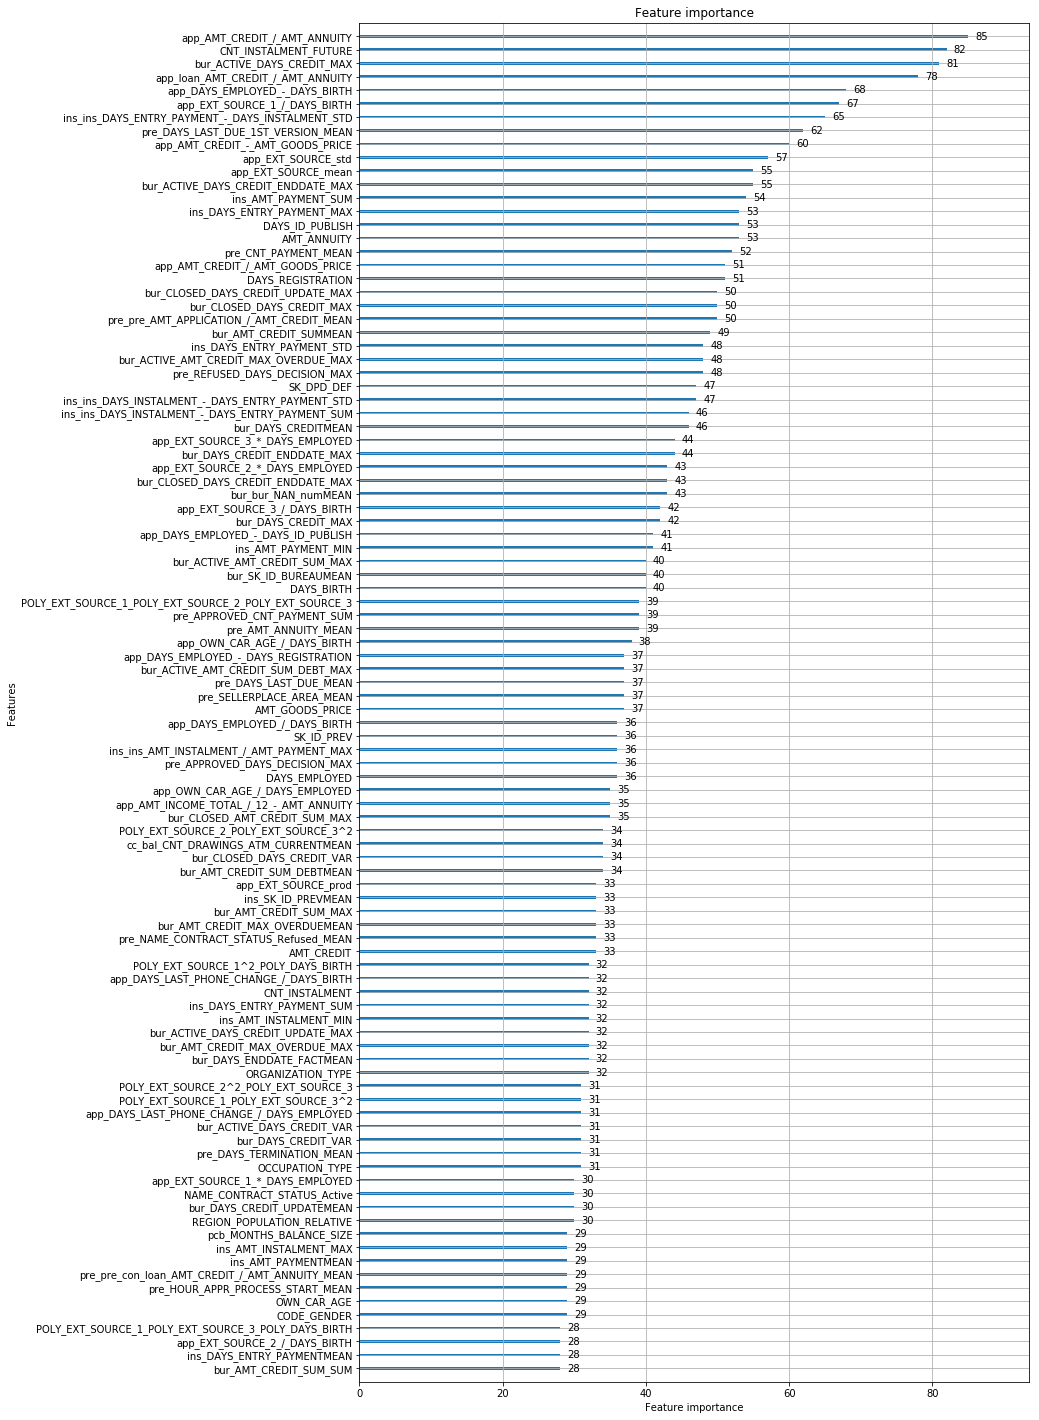

In [26]:
lgb.plot_importance(clf, figsize=(12, 25), max_num_features=100);


### <a id="5.1">5.1 Predict</a>

In [27]:
preds = np.mean(list_preds, axis=0)

#preds = None

    
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("../output/9.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.049501
1,100005,0.131441
2,100013,0.019956
3,100028,0.036173
4,100038,0.144426


In [28]:
print('my base lgbm + probause, app domain, poly, data clean, agg feature, category feature')
print(sc_auc_score, ',' ,max_score)

my base lgbm + probause, app domain, poly, data clean, agg feature, category feature
0.7838900445209656 , 0.7847133833767219


In [30]:
print('result: 0.792')

result: 0.792
